In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout,Input,Normalization
from eval_class import *
from keras.callbacks import EarlyStopping
from keras import regularizers

In [2]:
B14 = pd.read_csv(r'C:/Users/Sharif/Downloads/14pred(1).csv')

In [5]:
B14

,Close_pred14,Date
0,11237.022,20110904
1,11209.447,20110906
2,11762.574,20110910
3,12926.730,20110917
4,12505.157,20110918
...,...,...
1920,139651.450,20230520
1921,141838.730,20230521
1922,142109.530,20230522
1923,145302.310,20230523


In [3]:
df = pd.read_csv(r'C:\Users\Sharif\Downloads\feature-rasad-target1 (2).csv')
df

,Unnamed: 0,Date,Open,High,Low,Close,v_i_buy,v_n_buy,v_i_sell,v_n_sell,...,ADX,RSI,MACD,MACD_signal,Close_EMA_10,EMA_10_EMA_30,MACD_Signal_MACD,return,target,RSI_Signal
0,0,20110711,12500,12500,12500,12500,30320681.0,89389319.0,0.0,119710000.0,...,NaN,NaN,NaN,NaN,-1,-1,-1,NaN,1,0
1,1,20110712,12610,12940,12511,12513,839652.0,2603130.0,3327282.0,115500.0,...,NaN,NaN,NaN,NaN,-1,-1,-1,0.002885,0,0
2,2,20110713,12515,12685,12501,12502,305908.0,6485132.0,6324540.0,466500.0,...,NaN,NaN,NaN,NaN,-1,-1,-1,-0.002440,0,0
3,3,20110719,12629,12629,12500,12501,98549.0,1580602.0,1578151.0,101000.0,...,NaN,NaN,NaN,NaN,-1,-1,-1,-0.000222,0,0
4,4,20110720,12501,12515,12500,12500,104577.0,2076431.0,1822008.0,359000.0,...,NaN,NaN,NaN,NaN,-1,-1,-1,-0.000222,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,2636,20230710,142600,143300,138000,140000,391689.0,118067.0,474867.0,34889.0,...,27.755733,34.996847,-0.020761,-0.023017,-1,-1,-1,-0.019505,0,0
2637,2637,20230711,139000,139000,133300,133650,377747.0,20807.0,398354.0,200.0,...,28.330664,30.024964,-0.021749,-0.022763,-1,-1,-1,-0.049302,0,0
2638,2638,20230712,133550,138950,129200,133400,441901.0,50931.0,435832.0,57000.0,...,29.278364,29.845194,-0.022335,-0.022677,-1,-1,-1,-0.001992,0,-1
2639,2639,20230715,133800,138900,133650,136450,507663.0,21897.0,344784.0,184776.0,...,30.158370,34.961427,-0.021805,-0.022503,-1,-1,-1,0.024031,0,0


In [4]:
L=[]
for  i in range(len(df)):
    L.append(df['v_i_buy'][i]+df['v_n_buy'][i]+df['v_i_sell'][i]+df['v_n_sell'][i])
df['volume']=L
#calculate features
df['f18'] = (df['v_i_sell'].rolling(5).mean().apply(np.log)).tolist()
df['f33'] = (df['v_i_buy']/df['n_i_buy']).tolist()
df['f34'] = (df['v_n_buy']/df['n_n_buy']).tolist()
df['f35'] = (df['v_i_sell']/df['n_i_sell']).tolist()
df['f36'] = (df['v_n_sell']/df['n_n_sell']).tolist()
df['f20'] = (df.volume/df.volume.rolling(200).mean()-1).tolist()

In [6]:
df = df.merge(B14, left_on='Date', right_on='Date')
df=df.drop(['Unnamed: 0'],axis=1)
df

,Unnamed: 0,Date,Open,High,Low,Close,v_i_buy,v_n_buy,v_i_sell,v_n_sell,...,target,RSI_Signal,volume,f18,f33,f34,f35,f36,f20,Close_pred14
0,34,20110904,12350,12400,12350,12358,1213.0,189787.0,90400.0,100600.0,...,0,0,382000.0,11.663787,606.500000,189787.000000,10044.444444,50300.000000,NaN,11237.022
1,36,20110906,12362,12400,12362,12362,6852.0,405662.0,123114.0,289400.0,...,0,0,825028.0,11.680851,1713.000000,202831.000000,6839.666667,144700.000000,NaN,11209.447
2,38,20110910,12379,12439,12378,12378,17354.0,289524.0,56878.0,250000.0,...,0,0,613756.0,11.652536,2169.250000,144762.000000,3159.888889,250000.000000,NaN,11762.574
3,43,20110917,12454,12600,12454,12600,29918.0,102613.0,117531.0,15000.0,...,0,1,265062.0,11.298206,4986.333333,51306.500000,3791.322581,15000.000000,NaN,12926.730
4,44,20110918,12600,12984,12600,12655,165870.0,70096.0,95186.0,140780.0,...,0,1,471932.0,11.253426,8293.500000,17524.000000,1586.433333,46926.666667,NaN,12505.157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,2601,20230520,186500,186500,176400,178550,595839.0,987785.0,780507.0,803117.0,...,0,0,3167248.0,13.760271,835.678822,98778.500000,1757.898649,61778.230769,0.555266,139651.450
1921,2602,20230521,178500,182500,176400,182000,397409.0,769380.0,573198.0,593591.0,...,0,0,2333578.0,13.663519,631.810811,69943.636364,1647.120690,98931.833333,0.145481,141838.730
1922,2603,20230522,184000,185000,178500,180350,1028314.0,596120.0,653023.0,971411.0,...,0,0,3248868.0,13.487620,1360.203704,74515.000000,1892.820290,57141.823529,0.587878,142109.530
1923,2604,20230523,182350,184500,180000,182500,642384.0,360192.0,434228.0,568348.0,...,0,0,2005152.0,13.293699,1363.872611,120064.000000,1419.045752,56834.800000,-0.018482,145302.310


In [9]:
train=df[:1347]
validation=df[1347:]

In [24]:
train['return1'] = np.log(train['Close_pred14']/train['Close'])
a=np.log(train['Close_pred14']/train['Close'])
a.describe()

C:\Users\Sharif\AppData\Local\Temp\ipykernel_6992\896230451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['return1'] = np.log(train['Close_pred14']/train['Close'])


count    1347.000000
mean        0.029342
std         0.134972
min        -0.325678
25%        -0.052835
50%         0.032203
75%         0.108506
max         0.520878
dtype: float64

In [25]:
train['target1'] = np.where((train['return1'] <-0.07) , 1, np.where(train['return1'] >   0.09, -1, 0))

C:\Users\Sharif\AppData\Local\Temp\ipykernel_6992\3522245878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['target1'] = np.where((train['return1'] <-0.07) , 1, np.where(train['return1'] >   0.09, -1, 0))


In [26]:
datas={
    "signal":train.target1.tolist(),
    "close":train.Close.tolist() 
}
y1=pd.DataFrame(datas)
profit, win_rate = eval_strategy(y1)
print("profit:", profit,"\nwin_rate:", win_rate)

profit: 941.8229 
win_rate: 0.95


In [27]:
L=[-1]
for i in range(len(train)-2):
    L.append(0)
L.append(1)

datas={
    "signal":L,
    "close":train.Close.tolist() 
}
y1=pd.DataFrame(datas)
profit, win_rate = eval_strategy(y1)
print("profit:", profit,"\nwin_rate:", win_rate)

profit: 12.3851 
win_rate: 1.0


In [28]:
a = train[['Date','Close','ATR', 'ADX','RSI', 'RSI_Signal', 'Close_EMA_10', 'EMA_10_EMA_30', 'MACD_Signal_MACD','f18', 'f33', 'f34', 'f35', 'f36','target1']]
a = a.dropna()
x_train = a[['Date','Close','ATR', 'ADX','RSI', 'RSI_Signal', 'Close_EMA_10', 'EMA_10_EMA_30', 'MACD_Signal_MACD','f18', 'f33', 'f34', 'f35', 'f36']]
y_train = a['target1']

In [32]:
validation['return1'] = np.log(validation['Close_pred14'].shift(-10)/validation['Close_pred14'])
validation['target1'] = np.where((validation['return1'] < -0.07) , 1, np.where(validation['return1'] >  0.09, -1, 0))

C:\Users\Sharif\AppData\Local\Temp\ipykernel_6992\675336397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['return1'] = np.log(validation['Close_pred14'].shift(-10)/validation['Close_pred14'])
C:\Users\Sharif\AppData\Local\Temp\ipykernel_6992\675336397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['target1'] = np.where((validation['return1'] < -0.07) , 1, np.where(validation['return1'] >  0.09, -1, 0))


In [33]:
b = validation[['Date','Close','ATR', 'ADX','RSI', 'RSI_Signal', 'Close_EMA_10', 'EMA_10_EMA_30', 'MACD_Signal_MACD','f18', 'f33', 'f34', 'f35', 'f36','target1']]
b = b.dropna()
x_valid = b[['Date','Close','ATR', 'ADX','RSI', 'RSI_Signal', 'Close_EMA_10', 'EMA_10_EMA_30', 'MACD_Signal_MACD','f18', 'f33', 'f34', 'f35', 'f36']]
y_valid = b['target1']

In [34]:
def model_selection(X1,Y):
    seed = 7
    models = []
    models.append(('LogisticRegression', LogisticRegression(random_state=seed)))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNeighborsClassifier', KNeighborsClassifier()))
    models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
    models.append(('GaussianNB', GaussianNB()))
    models.append(('RandomForestClassifier', RandomForestClassifier()))
    models.append(('ExtraTreesClassifier',ExtraTreesClassifier(random_state=seed)))
    models.append(('AdaBoostClassifier',AdaBoostClassifier(DecisionTreeClassifier(random_state=seed),random_state=seed,learning_rate=0.01)))
    models.append(('SVM',svm.SVC(random_state=seed)))
    models.append(('GradientBoostingClassifier',GradientBoostingClassifier(random_state=seed)))
    models.append(('MLPClassifier',MLPClassifier(random_state=seed)))
    # evaluate each model in turn
    results = []
    names = []
    output = pd.DataFrame() 
    output = X1.reset_index(drop=True)
    output['Target'] = Y.reset_index(drop=True)
    output1 = pd.DataFrame() 
    output1 = x_valid.reset_index(drop=True)
    output1['Target'] = y_valid.reset_index(drop=True)
    #output2 = pd.DataFrame() 
   # output2 = x_test.reset_index(drop=True)
    #output2['Target'] = y_test.reset_index(drop=True)
    scoring = 'accuracy'
    scores = []
    for name, model in models:
        kfold = KFold(n_splits=10, shuffle=True, random_state=seed) 
        cv_results = cross_val_score(model, X1, Y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        model = model.fit(X1,Y)
        output[name] = model.predict(X1)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        score = model.score(x_valid, y_valid)
        scores.append(score)
        output1[name] = model.predict(x_valid) 
       # output2[name] = model.predict(x_test)
        msg1 = "%s: %f" % (name, score)
        print(msg1)
    return results, names, output, scores, output1 

In [35]:
results, names, output, scores ,output1  = model_selection(x_train,y_train)

C:\Users\Sharif\anaconda3\envs\notebook\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sharif\anaconda3\envs\notebook\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

LogisticRegression: 0.484765 (0.039414)
LogisticRegression: 0.254325
LDA: 0.508535 (0.026284)
LDA: 0.195502
KNeighborsClassifier: 0.482471 (0.042658)
KNeighborsClassifier: 0.226644
DecisionTreeClassifier: 0.772836 (0.035949)
DecisionTreeClassifier: 0.160900
GaussianNB: 0.487734 (0.026600)
GaussianNB: 0.183391
RandomForestClassifier: 0.829967 (0.035580)
RandomForestClassifier: 0.150519
ExtraTreesClassifier: 0.841144 (0.035027)
ExtraTreesClassifier: 0.153979
AdaBoostClassifier: 0.765395 (0.043686)
AdaBoostClassifier: 0.176471
SVM: 0.488485 (0.036887)
SVM: 0.742215
GradientBoostingClassifier: 0.809187 (0.033115)
GradientBoostingClassifier: 0.150519
MLPClassifier: 0.345965 (0.113497)
MLPClassifier: 0.742215


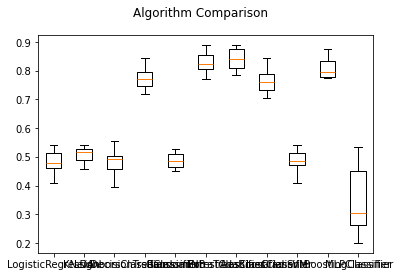

In [36]:
def plot_models(results, names):
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
plot_models(results, names)

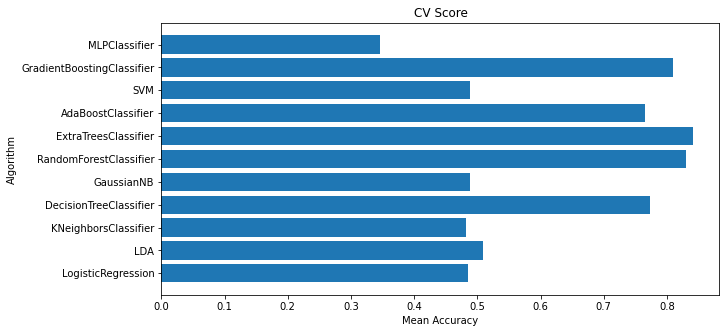

In [37]:
means = np.array(results).mean(axis=1)
fig = plt.figure(figsize=(10, 5))
# creating the bar plot
plt.barh(names,means)
plt.xlabel("Mean Accuracy")
plt.ylabel("Algorithm")
plt.title("CV Score")
plt.show()


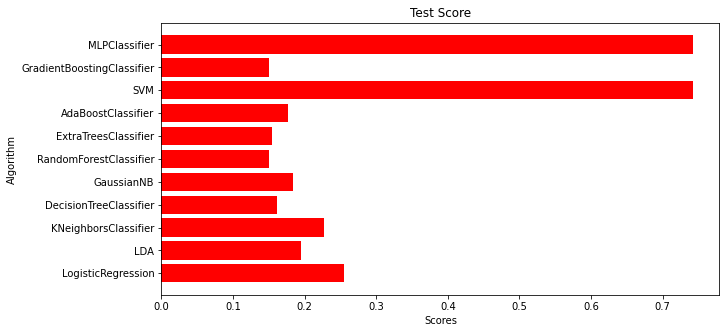

In [38]:
fig = plt.figure(figsize=(10, 5))
# creating the bar plot
plt.barh(names,scores,color='r')
plt.xlabel("Scores")
plt.ylabel("Algorithm")
plt.title("Test Score")
plt.show()

In [40]:
#LogisticRegression 	LMz6XaxP7FaH5uUuJbRyeEuQ2XGadC84Cu 	KNeighborsClassifier 	DecisionTreeClassifier 	GaussianNB 	RandomForestClassifier 	ExtraTreesClassifier 	AdaBoostClassifier 	SVM 	GradientBoostingClassifier 	MLPClassifier
out_puts=output.copy()

datas={
    "signal":out_puts.LDA.tolist(),
    "close":out_puts.Close.tolist() 
}
sample_eval_LDA=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_LDA)):
    if a == 1 and sample_eval_LDA.signal[i] == 1 or a == -1 and sample_eval_LDA.signal[i] == -1:
        sample_eval_LDA.signal[i] = 0
    elif a == -1 and sample_eval_LDA.signal[i] == 1 or a == 1 and sample_eval_LDA.signal[i] == -1:
        a = sample_eval_LDA.signal[i]
    elif a == 0 and sample_eval_LDA.signal[i] == -1:
        a = sample_eval_LDA.signal[i]
    elif a == 0 and sample_eval_LDA.signal[i] == 1:       
        sample_eval_LDA.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_LDA)
print("LDA","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts.KNeighborsClassifier.tolist(),
    "close":out_puts.Close.tolist() 
}
sample_eval_KNN=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_KNN)):
    if a == 1 and sample_eval_KNN.signal[i] == 1 or a == -1 and sample_eval_KNN.signal[i] == -1:
        sample_eval_KNN.signal[i] = 0
    elif a == -1 and sample_eval_KNN.signal[i] == 1 or a == 1 and sample_eval_KNN.signal[i] == -1:
        a = sample_eval_KNN.signal[i]
    elif a == 0 and sample_eval_KNN.signal[i] == -1:
        a = sample_eval_KNN.signal[i]
    elif a == 0 and sample_eval_KNN.signal[i] == 1:       
        sample_eval_KNN.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_KNN)
print("KNN","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts.DecisionTreeClassifier.tolist(),
    "close":out_puts.Close.tolist() 
}
sample_eval_Dtree=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_Dtree)):
    if a == 1 and sample_eval_Dtree.signal[i] == 1 or a == -1 and sample_eval_Dtree.signal[i] == -1:
        sample_eval_Dtree.signal[i] = 0
    elif a == -1 and sample_eval_Dtree.signal[i] == 1 or a == 1 and sample_eval_Dtree.signal[i] == -1:
        a = sample_eval_Dtree.signal[i]
    elif a == 0 and sample_eval_Dtree.signal[i] == -1:
        a = sample_eval_Dtree.signal[i]
    elif a == 0 and sample_eval_Dtree.signal[i] == 1:       
        sample_eval_Dtree.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_Dtree)
print("Dtree","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts.GaussianNB.tolist(),
    "close":out_puts.Close.tolist() 
}
sample_eval_GausianNB=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_GausianNB)):
    if a == 1 and sample_eval_GausianNB.signal[i] == 1 or a == -1 and sample_eval_GausianNB.signal[i] == -1:
        sample_eval_GausianNB.signal[i] = 0
    elif a == -1 and sample_eval_GausianNB.signal[i] == 1 or a == 1 and sample_eval_GausianNB.signal[i] == -1:
        a = sample_eval_GausianNB.signal[i]
    elif a == 0 and sample_eval_GausianNB.signal[i] == -1:
        a = sample_eval_GausianNB.signal[i]
    elif a == 0 and sample_eval_GausianNB.signal[i] == 1:       
        sample_eval_GausianNB.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_GausianNB)
print("GausianNB","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts.RandomForestClassifier.tolist(),
    "close":out_puts.Close.tolist() 
}
sample_eval_RF=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_RF)):
    if a == 1 and sample_eval_RF.signal[i] == 1 or a == -1 and sample_eval_RF.signal[i] == -1:
        sample_eval_RF.signal[i] = 0
    elif a == -1 and sample_eval_RF.signal[i] == 1 or a == 1 and sample_eval_RF.signal[i] == -1:
        a = sample_eval_RF.signal[i]
    elif a == 0 and sample_eval_RF.signal[i] == -1:
        a = sample_eval_RF.signal[i]
    elif a == 0 and sample_eval_RF.signal[i] == 1:       
        sample_eval_RF.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_RF)
print("RF","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts.ExtraTreesClassifier.tolist(),
    "close":out_puts.Close.tolist() 
}
sample_eval_Etree=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_Etree)):
    if a == 1 and sample_eval_Etree.signal[i] == 1 or a == -1 and sample_eval_Etree.signal[i] == -1:
        sample_eval_Etree.signal[i] = 0
    elif a == -1 and sample_eval_Etree.signal[i] == 1 or a == 1 and sample_eval_Etree.signal[i] == -1:
        a = sample_eval_Etree.signal[i]
    elif a == 0 and sample_eval_Etree.signal[i] == -1:
        a = sample_eval_Etree.signal[i]
    elif a == 0 and sample_eval_Etree.signal[i] == 1:       
        sample_eval_Etree.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_Etree)
print("Etree","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts.AdaBoostClassifier.tolist(),
    "close":out_puts.Close.tolist() 
}
sample_eval_AdaBoot=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_AdaBoot)):
    if a == 1 and sample_eval_AdaBoot.signal[i] == 1 or a == -1 and sample_eval_AdaBoot.signal[i] == -1:
        sample_eval_AdaBoot.signal[i] = 0
    elif a == -1 and sample_eval_AdaBoot.signal[i] == 1 or a == 1 and sample_eval_AdaBoot.signal[i] == -1:
        a = sample_eval_AdaBoot.signal[i]
    elif a == 0 and sample_eval_AdaBoot.signal[i] == -1:
        a = sample_eval_AdaBoot.signal[i]
    elif a == 0 and sample_eval_AdaBoot.signal[i] == 1:       
        sample_eval_AdaBoot.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_AdaBoot)
print("AdaBoot","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts.GradientBoostingClassifier.tolist(),
    "close":out_puts.Close.tolist(),
    "Date":out_puts.Date.tolist()
}
sample_eval_GBooting=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_GBooting)):
    if a == 1 and sample_eval_GBooting.signal[i] == 1 or a == -1 and sample_eval_GBooting.signal[i] == -1:
        sample_eval_GBooting.signal[i] = 0
    elif a == -1 and sample_eval_GBooting.signal[i] == 1 or a == 1 and sample_eval_GBooting.signal[i] == -1:
        a = sample_eval_GBooting.signal[i]
    elif a == 0 and sample_eval_GBooting.signal[i] == -1:
        a = sample_eval_GBooting.signal[i]
    elif a == 0 and sample_eval_GBooting.signal[i] == 1:       
        sample_eval_GBooting.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_GBooting)
print("GBooting","profit:", profit,"\nwin_rate:", win_rate)

LDA profit: 10.3693 
win_rate: 0.5333
KNN profit: 35.1047 
win_rate: 0.661
Dtree profit: 941.8229 
win_rate: 0.95
GausianNB profit: 3.3378 
win_rate: 0.4783
RF profit: 941.8229 
win_rate: 0.95
Etree profit: 941.8229 
win_rate: 0.95
AdaBoot profit: 941.8229 
win_rate: 0.95
GBooting profit: 782.7137 
win_rate: 0.9412


In [ ]:
import finplot as fplt

# CREATE A TICKER INSTANCE FOR TESLA
#Rasad = yf.Ticker('TSLA')

# RETRIEVE 1 YEAR WORTH OF DAILY DATA OF TESLA
#df = Rasad.history(interval='1d',period='1y')

# PLOT THE OHLC CANDLE CHART
aa=train1[['Open_x','Close_x','High_x','Low_x','Date']]
ab=sample_eval_GBooting
aa=ab.merge(aa, left_on='Date', right_on='Date')

fplt.candlestick_ochl(aa[['Open_x','Close_x','High_x','Low_x']])
#train1['AdaBoostClassifier']=sample_eval_AdaBoot['signal']
lo_wicks=sample_eval_GBooting['signal']
aa.loc[(lo_wicks==1),'marker'] = aa['Close_x']
fplt.plot(aa.index, aa['marker'],color='navy', style='^', legend='dumb mark')
aa.loc[(lo_wicks==-1),'marker1'] = aa['Close_x']
fplt.plot(aa.index, aa['marker1'],color='lawngreen', style='v', legend='dumb mark')

#fplt.plot(a , color='black', legend='Log price')
fplt.show()

In [42]:
out_puts1=output1.copy()

#LogisticRegression 	LMz6XaxP7FaH5uUuJbRyeEuQ2XGadC84Cu 	KNeighborsClassifier 	DecisionTreeClassifier 	GaussianNB 	RandomForestClassifier 	ExtraTreesClassifier 	AdaBoostClassifier 	SVM 	GradientBoostingClassifier 	MLPClassifier


datas={
    "signal":out_puts1.LDA.tolist(),
    "close":out_puts1.Close.tolist() 
}
sample_eval_LDA=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_LDA)):
    if a == 1 and sample_eval_LDA.signal[i] == 1 or a == -1 and sample_eval_LDA.signal[i] == -1:
        sample_eval_LDA.signal[i] = 0
    elif a == -1 and sample_eval_LDA.signal[i] == 1 or a == 1 and sample_eval_LDA.signal[i] == -1:
        a = sample_eval_LDA.signal[i]
    elif a == 0 and sample_eval_LDA.signal[i] == -1:
        a = sample_eval_LDA.signal[i]
    elif a == 0 and sample_eval_LDA.signal[i] == 1:       
        sample_eval_LDA.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_LDA)
print("LDA","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts1.KNeighborsClassifier.tolist(),
    "close":out_puts1.Close.tolist() 
}
sample_eval_KNN=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_KNN)):
    if a == 1 and sample_eval_KNN.signal[i] == 1 or a == -1 and sample_eval_KNN.signal[i] == -1:
        sample_eval_KNN.signal[i] = 0
    elif a == -1 and sample_eval_KNN.signal[i] == 1 or a == 1 and sample_eval_KNN.signal[i] == -1:
        a = sample_eval_KNN.signal[i]
    elif a == 0 and sample_eval_KNN.signal[i] == -1:
        a = sample_eval_KNN.signal[i]
    elif a == 0 and sample_eval_KNN.signal[i] == 1:       
        sample_eval_KNN.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_KNN)
print("KNN","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts1.DecisionTreeClassifier.tolist(),
    "close":out_puts1.Close.tolist() 
}
sample_eval_Dtree=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_Dtree)):
    if a == 1 and sample_eval_Dtree.signal[i] == 1 or a == -1 and sample_eval_Dtree.signal[i] == -1:
        sample_eval_Dtree.signal[i] = 0
    elif a == -1 and sample_eval_Dtree.signal[i] == 1 or a == 1 and sample_eval_Dtree.signal[i] == -1:
        a = sample_eval_Dtree.signal[i]
    elif a == 0 and sample_eval_Dtree.signal[i] == -1:
        a = sample_eval_Dtree.signal[i]
    elif a == 0 and sample_eval_Dtree.signal[i] == 1:       
        sample_eval_Dtree.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_Dtree)
print("Dtree","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts1.GaussianNB.tolist(),
    "close":out_puts1.Close.tolist() 
}
sample_eval_GausianNB=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_GausianNB)):
    if a == 1 and sample_eval_GausianNB.signal[i] == 1 or a == -1 and sample_eval_GausianNB.signal[i] == -1:
        sample_eval_GausianNB.signal[i] = 0
    elif a == -1 and sample_eval_GausianNB.signal[i] == 1 or a == 1 and sample_eval_GausianNB.signal[i] == -1:
        a = sample_eval_GausianNB.signal[i]
    elif a == 0 and sample_eval_GausianNB.signal[i] == -1:
        a = sample_eval_GausianNB.signal[i]
    elif a == 0 and sample_eval_GausianNB.signal[i] == 1:       
        sample_eval_GausianNB.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_GausianNB)
print("GausianNB","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts1.RandomForestClassifier.tolist(),
    "close":out_puts1.Close.tolist() 
}
sample_eval_RF=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_RF)):
    if a == 1 and sample_eval_RF.signal[i] == 1 or a == -1 and sample_eval_RF.signal[i] == -1:
        sample_eval_RF.signal[i] = 0
    elif a == -1 and sample_eval_RF.signal[i] == 1 or a == 1 and sample_eval_RF.signal[i] == -1:
        a = sample_eval_RF.signal[i]
    elif a == 0 and sample_eval_RF.signal[i] == -1:
        a = sample_eval_RF.signal[i]
    elif a == 0 and sample_eval_RF.signal[i] == 1:       
        sample_eval_RF.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_RF)
print("RF","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts1.ExtraTreesClassifier.tolist(),
    "close":out_puts1.Close.tolist() 
}
sample_eval_Etree=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_Etree)):
    if a == 1 and sample_eval_Etree.signal[i] == 1 or a == -1 and sample_eval_Etree.signal[i] == -1:
        sample_eval_Etree.signal[i] = 0
    elif a == -1 and sample_eval_Etree.signal[i] == 1 or a == 1 and sample_eval_Etree.signal[i] == -1:
        a = sample_eval_Etree.signal[i]
    elif a == 0 and sample_eval_Etree.signal[i] == -1:
        a = sample_eval_Etree.signal[i]
    elif a == 0 and sample_eval_Etree.signal[i] == 1:       
        sample_eval_Etree.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_Etree)
print("Etree","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts1.AdaBoostClassifier.tolist(),
    "close":out_puts1.Close.tolist() 
}
sample_eval_AdaBoot=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_AdaBoot)):
    if a == 1 and sample_eval_AdaBoot.signal[i] == 1 or a == -1 and sample_eval_AdaBoot.signal[i] == -1:
        sample_eval_AdaBoot.signal[i] = 0
    elif a == -1 and sample_eval_AdaBoot.signal[i] == 1 or a == 1 and sample_eval_AdaBoot.signal[i] == -1:
        a = sample_eval_AdaBoot.signal[i]
    elif a == 0 and sample_eval_AdaBoot.signal[i] == -1:
        a = sample_eval_AdaBoot.signal[i]
    elif a == 0 and sample_eval_AdaBoot.signal[i] == 1:       
        sample_eval_AdaBoot.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_AdaBoot)
print("AdaBoot","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts1.GradientBoostingClassifier.tolist(),
    "close":out_puts1.Close.tolist(),
    "Date":out_puts1.Date.tolist()
    
}
sample_eval_GBooting=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_GBooting)):
    if a == 1 and sample_eval_GBooting.signal[i] == 1 or a == -1 and sample_eval_GBooting.signal[i] == -1:
        sample_eval_GBooting.signal[i] = 0
    elif a == -1 and sample_eval_GBooting.signal[i] == 1 or a == 1 and sample_eval_GBooting.signal[i] == -1:
        a = sample_eval_GBooting.signal[i]
    elif a == 0 and sample_eval_GBooting.signal[i] == -1:
        a = sample_eval_GBooting.signal[i]
    elif a == 0 and sample_eval_GBooting.signal[i] == 1:       
        sample_eval_GBooting.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_GBooting)
print("GBooting","profit:", profit,"\nwin_rate:", win_rate)


LDA profit: 1.0713 
win_rate: 0.625
KNN profit: 0.768 
win_rate: 0.5854
Dtree profit: 1.917 
win_rate: 1.0
GausianNB profit: 1.4284 
win_rate: 1.0
RF profit: 2.2518 
win_rate: 0.7895
Etree profit: 1.049 
win_rate: 0.6522
AdaBoot profit: 1.6427 
win_rate: 0.8182
GBooting profit: 1.6199 
win_rate: 0.6923


In [ ]:
# CREATE A TICKER INSTANCE FOR TESLA
#Rasad = yf.Ticker('TSLA')

# RETRIEVE 1 YEAR WORTH OF DAILY DATA OF TESLA
#df = Rasad.history(interval='1d',period='1y')

# PLOT THE OHLC CANDLE CHART
aa=valid1[['Open_x','Close_x','High_x','Low_x','Date']]
ab=sample_eval_GBooting
aa=ab.merge(aa, left_on='Date', right_on='Date')

fplt.candlestick_ochl(aa[['Open_x','Close_x','High_x','Low_x']])
#train1['AdaBoostClassifier']=sample_eval_AdaBoot['signal']
lo_wicks=sample_eval_GBooting['signal']
aa.loc[(lo_wicks==1),'marker'] = aa['Close_x']
fplt.plot(aa.index, aa['marker'],color='navy', style='^', legend='dumb mark')
aa.loc[(lo_wicks==-1),'marker1'] = aa['Close_x']
fplt.plot(aa.index, aa['marker1'],color='lawngreen', style='v', legend='dumb mark')

#fplt.plot(a , color='black', legend='Log price')
fplt.show()